In [3]:
pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 3.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.5 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.5 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.5 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.5 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.5 MB 2.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.5 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.5 MB 2.9 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.5 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.5 MB 3.0 MB/s eta 0:00:02
   --

In [1]:
# Core data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\darms\AppData\Local\Temp\ipykernel_15088\3319621034.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2, data3], labels=['Group 1', 'Group 2', 'Group 3'])


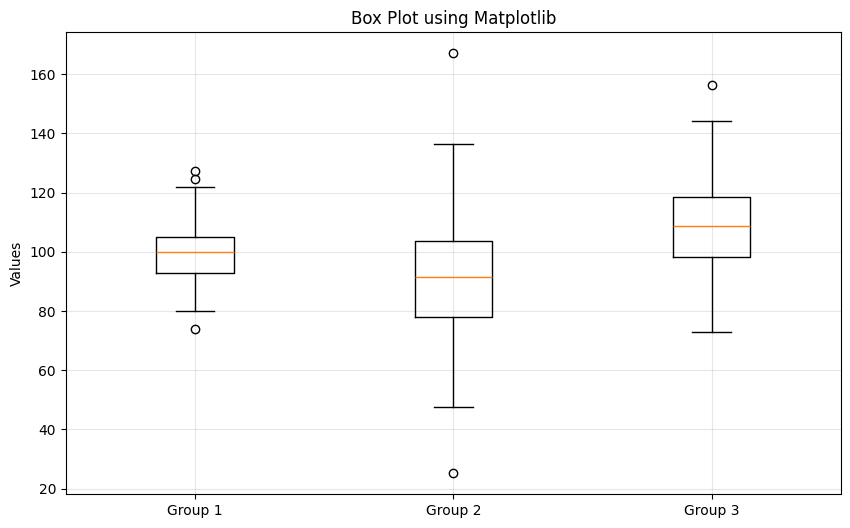

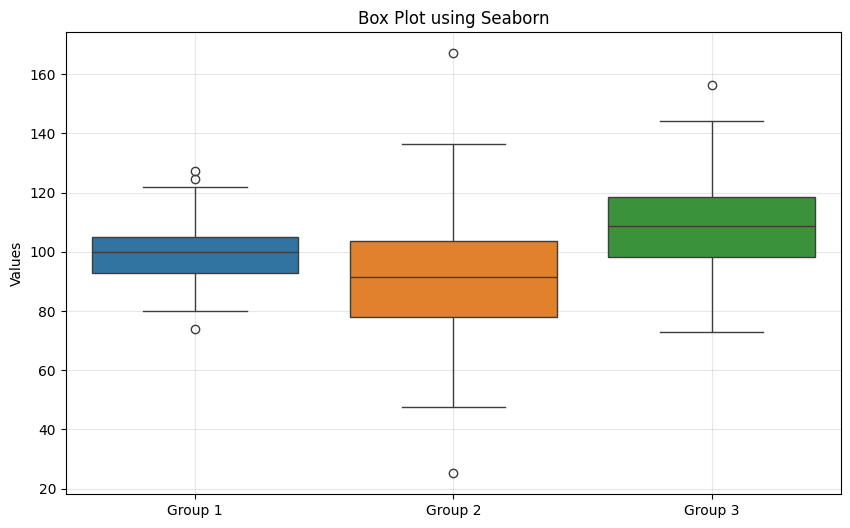

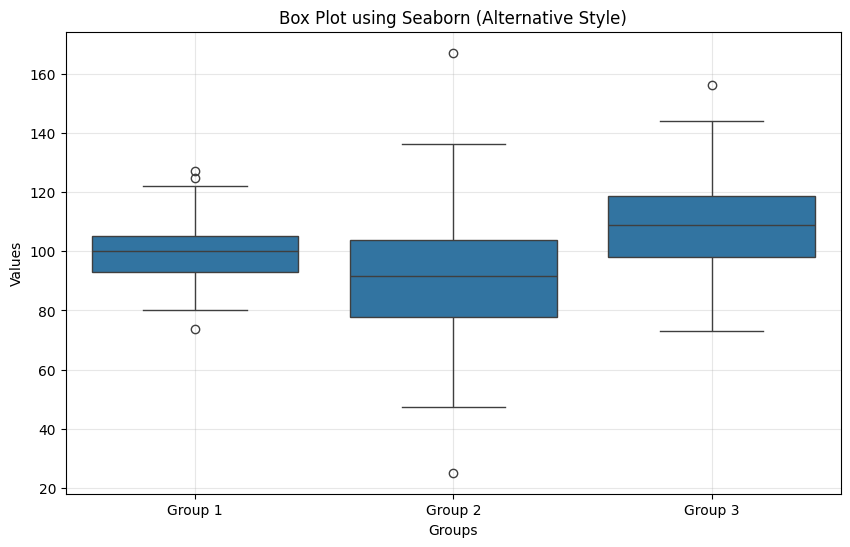

In [5]:
# Generate sample data
np.random.seed(42)  # for reproducibility
data1 = np.random.normal(100, 10, 200)  # mean=100, std=10, size=200
data2 = np.random.normal(90, 20, 200)   # mean=90, std=20, size=200
data3 = np.random.normal(110, 15, 200)  # mean=110, std=15, size=200

# Method 1: Using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([data1, data2, data3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot using Matplotlib')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.show()

# Method 2: Using Seaborn (often preferred for its aesthetic)
# First, create a DataFrame
df = pd.DataFrame({
    'Group 1': data1,
    'Group 2': data2,
    'Group 3': data3
})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot using Seaborn')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.show()

# Alternative Seaborn style with different format
# Reshape the data for seaborn
df_melted = df.melt(var_name='Groups', value_name='Values')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Groups', y='Values', data=df_melted)
plt.title('Box Plot using Seaborn (Alternative Style)')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\darms\AppData\Local\Temp\ipykernel_34144\800744292.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


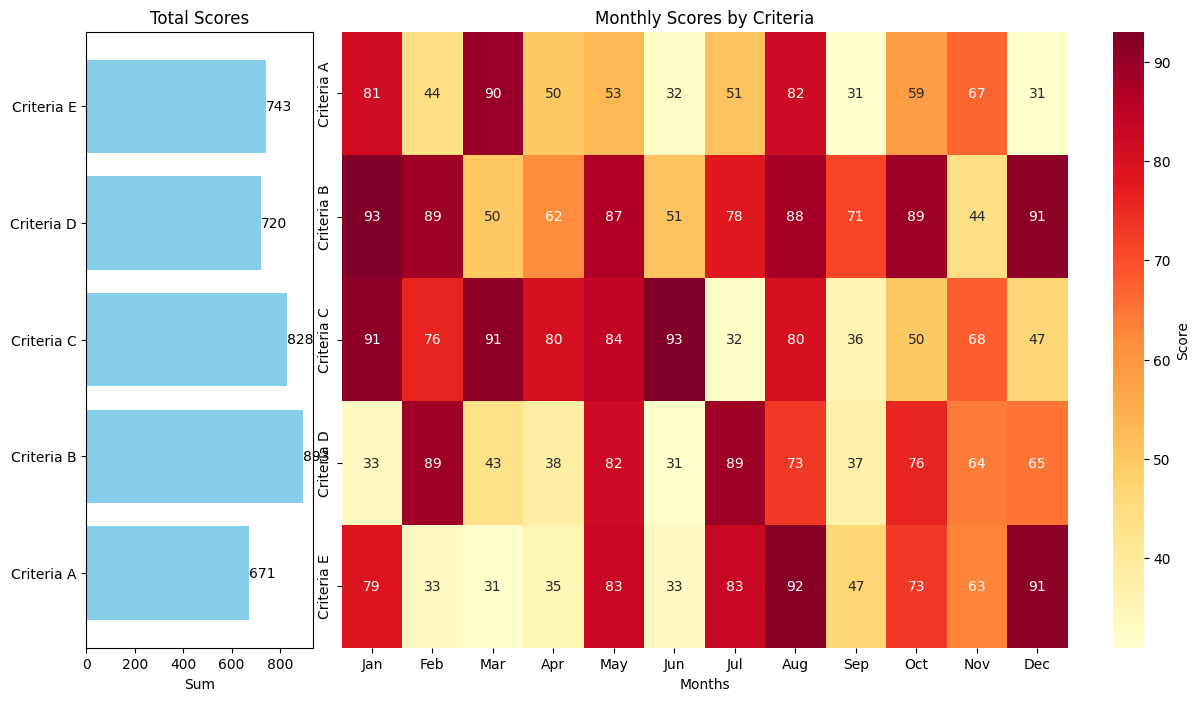


Detailed Data:
            Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Criteria A   81   44   90   50   53   32   51   82   31   59   67   31
Criteria B   93   89   50   62   87   51   78   88   71   89   44   91
Criteria C   91   76   91   80   84   93   32   80   36   50   68   47
Criteria D   33   89   43   38   82   31   89   73   37   76   64   65
Criteria E   79   33   31   35   83   33   83   92   47   73   63   91

Totals by Criteria:
Criteria A    671
Criteria B    893
Criteria C    828
Criteria D    720
Criteria E    743
dtype: int64


In [2]:
# Generate sample data
np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
criteria = ['Criteria A', 'Criteria B', 'Criteria C', 'Criteria D', 'Criteria E']

# Create sample data with some patterns
data = np.random.randint(30, 100, size=(len(criteria), len(months)))
df = pd.DataFrame(data, index=criteria, columns=months)

# Calculate row sums for the bar chart
row_sums = df.sum(axis=1)

# Create a figure with a specific size and gridspec
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 4], wspace=0.05)

# Create the bar chart subplot
ax1 = fig.add_subplot(gs[0])
bars = ax1.barh(criteria, row_sums, color='skyblue')
ax1.set_title('Total Scores')
ax1.set_xlabel('Sum')

# Create the heatmap subplot
ax2 = fig.add_subplot(gs[1])
sns.heatmap(df, 
            cmap='YlOrRd',  # Color scheme
            annot=True,     # Show values in cells
            fmt='d',        # Integer format for annotations
            cbar_kws={'label': 'Score'},
            ax=ax2)

# Customize heatmap
ax2.set_title('Monthly Scores by Criteria')
ax2.set_xlabel('Months')
ax2.set_ylabel('')  # Remove y-label since it's redundant

# Add value labels to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             ha='left', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# Print the data
print("\nDetailed Data:")
print(df)
print("\nTotals by Criteria:")
print(row_sums)
